In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps

# Make random number generator
rng = np.random.default_rng()

# Safe Pandas
pd.set_option('mode.copy_on_write', True)

# Plotting
import matplotlib.pyplot as plt

### Markdown for review ###
### First we need to set some parameters for our trial simulation, including, defining the following variables: ###
- Number of patients per group: this is pulled from our earlier power calculation 
- Initial pain scores (mean): derived from the mean pain score from ethnographic data
- Initial pain scores (std.dev): derived from the std_dev of pain scores from ethnographic data
- Number of simulations: how many times we want to run the trial 

### We also need to define and take account of (and can adjust) the expected pain reduction from each SOC care treatment ###
- CBT 
- Physio 
- Pain relief 

In [3]:
# Creating initial pain scores from ethnographic data
real_pain_scores = np.array([8,8,5,2])
mean_pain_score = np.mean(real_pain_scores) 
std_dev_pain_score = np.std(real_pain_scores)
print("mean pain score:", mean_pain_score)
print("std dev pain score:", std_dev_pain_score)

mean pain score: 5.75
std dev pain score: 2.48746859276655


In [6]:
# simulating the SOC treatments from trial design
n = 20
prescription_pain_relief = np.random.choice(['yes', 'no'], size=n)
cbt = np.random.choice(['yes', 'no'], size=n)
physiotherapy = np.random.choice(['yes', 'no'], size=n)

In [1]:
# start with one estimated group size 
n = 20

# create a dataframe for our simulated patient data
patient_df = pd.DataFrame()
patient_df['group'] = np.repeat(['VR therapy', 'VR documentary'], [n, n])
pre_mean = 5.75
pre_std = 2.48
initial_pain = rng.normal(pre_mean, pre_std, size=n * 2)
patient_df['initial pain score'] = np.clip(np.round(initial_pain), 1, 10)

# lets give each patient an age and combination of SOC treatments 
patient_df['age'] = rng.integers(18, 80, size=n * 2)
patient_df['prescription'] = np.random.choice(['yes', 'no'], size=n * 2)
patient_df['CBT'] = np.random.choice(['yes', 'no'], size=n * 2) 
patient_df['physiotherapy'] = np.random.choice(['yes', 'no'], size=n * 2)
patient_df

NameError: name 'pd' is not defined

In [12]:
# Now we simulate the pain scores at 6 weeks for each group assuming that there will be between a +1/-1 difference in pain scores for each patient
within_mean = -1
within_std = 1
within_difference = rng.normal(within_mean, within_std, size=n * 2)
patient_df['6 week pain score'] = np.clip(np.round(initial_pain + within_difference), 1, 10)
patient_df

,group,initial pain score,age,perscription,CBT,physiotherapy,6 week pain score
0,VR therapy,4.0,24,yes,yes,yes,2.0
1,VR therapy,4.0,76,yes,yes,no,2.0
2,VR therapy,7.0,36,yes,yes,no,6.0
3,VR therapy,1.0,45,yes,yes,yes,1.0
4,VR therapy,7.0,44,no,yes,yes,7.0
5,VR therapy,4.0,43,no,yes,yes,4.0
6,VR therapy,5.0,46,no,no,yes,3.0
7,VR therapy,8.0,71,yes,no,no,7.0
8,VR therapy,1.0,79,no,yes,yes,1.0
9,VR therapy,1.0,59,yes,no,yes,1.0


In [34]:
# Now we simulate the pain scores at 24 weeks for each group assuming that 
# there will be between a further -0.5 difference in pain scores from 6 weeks for each patient
within_mean_24 = -0.5
within_std_24 = 0.5
within_difference_24 = rng.normal(within_mean_24, within_std_24, size=n * 2)
patient_df['24 week pain score'] = np.clip(np.round(initial_pain + within_difference_24), 1, 10)
patient_df

,group,initial pain score,age,perscription,CBT,physiotherapy,6 week pain score,difference,24 week pain score
0,VR therapy,4.0,24,yes,yes,yes,1.0,3.0,4.0
1,VR therapy,4.0,76,yes,yes,no,1.0,3.0,4.0
2,VR therapy,7.0,36,yes,yes,no,5.0,2.0,6.0
3,VR therapy,1.0,45,yes,yes,yes,1.0,0.0,1.0
4,VR therapy,7.0,44,no,yes,yes,7.0,0.0,7.0
5,VR therapy,4.0,43,no,yes,yes,5.0,-1.0,3.0
6,VR therapy,5.0,46,no,no,yes,4.0,1.0,4.0
7,VR therapy,8.0,71,yes,no,no,6.0,2.0,7.0
8,VR therapy,1.0,79,no,yes,yes,1.0,0.0,1.0
9,VR therapy,1.0,59,yes,no,yes,1.0,0.0,1.0


### Estimating VR effect size ###
The anonymous ethnographic data provides four patients pain scores before and after trialing a 7 minute 'self care' immersive VR therapy. I'll compute the differences between the pain scores before and after the VR session for each patient, calculate the mean and standard deviation of these differences and use this to calculate Cohen's d (the mean difference divided by the standard deviation of the differences) to determine a reasonable estimate for effect size. 

In [13]:
# Assuming that the VR treatment will have a mean effect of -1 on pain scores and that the standard deviation of the effect is 1
vr_mean = -1  # Estimated average effect of VR
vr_std = 1  # STD
vr_effect = np.zeros(n * 2)
vr_effect[:n] = rng.normal(vr_mean, vr_std, size=n)
vr_effect

array([-1.43898972, -0.68025993, -1.63854174, -1.43558744,  0.5845845 ,
        0.58829495,  0.64272287, -0.71886142, -3.52796805, -1.9365352 ,
       -0.43379426, -1.50438013, -0.355976  ,  0.81549295, -0.17677707,
       -2.81158336, -1.55162947, -2.11250263, -1.75246201, -2.81927322,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [14]:
# Now we can update the VR effect to the post-pain scores 
patient_df['6 week pain score'] = np.clip(np.round(initial_pain + within_difference + vr_effect), 1, 10)
patient_df

,group,initial pain score,age,perscription,CBT,physiotherapy,6 week pain score
0,VR therapy,4.0,24,yes,yes,yes,1.0
1,VR therapy,4.0,76,yes,yes,no,1.0
2,VR therapy,7.0,36,yes,yes,no,5.0
3,VR therapy,1.0,45,yes,yes,yes,1.0
4,VR therapy,7.0,44,no,yes,yes,7.0
5,VR therapy,4.0,43,no,yes,yes,5.0
6,VR therapy,5.0,46,no,no,yes,4.0
7,VR therapy,8.0,71,yes,no,no,6.0
8,VR therapy,1.0,79,no,yes,yes,1.0
9,VR therapy,1.0,59,yes,no,yes,1.0


In [16]:
# what we're interested in is the difference in pain scores (per patient) post the VR therapy vs the VR documentary (control)
patient_df['difference'] = patient_df['initial pain score'] - patient_df['6 week pain score']
patient_df

,group,initial pain score,age,perscription,CBT,physiotherapy,6 week pain score,difference
0,VR therapy,4.0,24,yes,yes,yes,1.0,3.0
1,VR therapy,4.0,76,yes,yes,no,1.0,3.0
2,VR therapy,7.0,36,yes,yes,no,5.0,2.0
3,VR therapy,1.0,45,yes,yes,yes,1.0,0.0
4,VR therapy,7.0,44,no,yes,yes,7.0,0.0
5,VR therapy,4.0,43,no,yes,yes,5.0,-1.0
6,VR therapy,5.0,46,no,no,yes,4.0,1.0
7,VR therapy,8.0,71,yes,no,no,6.0,2.0
8,VR therapy,1.0,79,no,yes,yes,1.0,0.0
9,VR therapy,1.0,59,yes,no,yes,1.0,0.0


### Permutation testing ###

In [17]:
# calculate the mean difference in pain scores and display by group
diffs = patient_df.groupby('group')['difference'].mean()
diffs

group
VR documentary    1.15
VR therapy        1.55
Name: difference, dtype: float64

Interesting so we expected a pain reduction of 1 at 6 weeks for VR therapy and got 1.55 

In [26]:
# calculate the actual difference in pain scores between the two groups
# we estimated that the VR treatment would have a mean effect of -1 on pain scores
actual_diff = diffs['VR therapy'] - diffs['VR documentary']
# print(actual_diff)
differences = np.array(patient_df['difference'])

# Simulate one trial where n = 20

huffled = rng.permutation(differences)
fake_diff = np.mean(shuffled[:n]) - np.mean(shuffled[n:])
fake_diff

0.09999999999999987

In [28]:
# t-test version of the permutation test for quick result 
sps.ttest_ind(differences[:n], differences[n:])

TtestResult(statistic=0.9942926562028217, pvalue=0.32636993715283336, df=38.0)

## One trial where n = 20 resulted in a p-value of 0.32 aka the effect of VR therapy on this sample size was not statistically significant ##

Now we will simulate multiple trials to estimate the power of the study. I'll vary the sample size and calculate the power for each sample size. 

In [29]:
def simulate_trial(n, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std, n_permutations=10000):
    rng = np.random.default_rng()
    
    # Create initial pain scores
    initial_pain = rng.normal(pre_mean, pre_std, size=n * 2)
    initial_pain = np.clip(np.round(initial_pain), 1, 10)
    
    # Create dataframe for simulated patient data
    patient_df = pd.DataFrame()
    patient_df['group'] = np.repeat(['VR therapy', 'VR documentary'], [n, n])
    patient_df['initial pain score'] = initial_pain
    
    # Simulate post-pain scores
    within_difference = rng.normal(within_mean, within_std, size=n * 2)
    vr_effect = np.zeros(n * 2)
    vr_effect[:n] = rng.normal(vr_mean, vr_std, size=n)
    patient_df['6 week pain score'] = np.clip(np.round(initial_pain + within_difference + vr_effect), 1, 10)
    
    # Calculate difference in pain scores
    patient_df['difference'] = patient_df['initial pain score'] - patient_df['6 week pain score']
    
    # Calculate actual difference between groups
    diffs = patient_df.groupby('group')['difference'].mean()
    actual_diff = diffs['VR therapy'] - diffs['VR documentary']
    
    # Permutation test
    differences = np.array(patient_df['difference'])
    perm_diffs = np.zeros(n_permutations)
    
    for i in range(n_permutations):
        shuffled = rng.permutation(differences)
        fake_diff = np.mean(shuffled[:n]) - np.mean(shuffled[n:])
        perm_diffs[i] = fake_diff
    
    p_value = np.sum(np.abs(perm_diffs) >= np.abs(actual_diff)) / n_permutations
    
    return p_value


In [66]:
# Define the number of simulations
n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 20

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.216


In [68]:
# new trial with 60 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 60

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.957


In [30]:
# new trial with 40 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 40

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

KeyboardInterrupt: 

In [70]:
# new trial with 50 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 50

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.921


In [71]:
# new trial with 48 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 48

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.917


In [72]:
# new trial with 47 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 47

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.903


In [32]:
power_df = pd.DataFrame()
power_df['trial number'] = [1, 2, 3, 4, 5, 6]
power_df['group size'] = [20, 60, 40, 50, 48, 47]
power_df['proportion significant'] = [0.216, 0.957, 0.832, 0.921, 0.917, 0.903]
power_df.set_index('trial number', inplace=True)  
power_df  

,group size,proportion significant
trial number,,
1,20,0.216
2,60,0.957
3,40,0.832
4,50,0.921
5,48,0.917
6,47,0.903


In [12]:
desired_power = 0.80
min_sample_size = power_df[power_df['proportion significant'] >= desired_power]['group size'].min()

print(f"The minimum sample size required to achieve {desired_power * 100}% power is {min_sample_size}.")

The minimum sample size required to achieve 80.0% power is 40.


In [33]:
desired_power = 0.90
min_sample_size = power_df[power_df['proportion significant'] >= desired_power]['group size'].min()

print(f"The minimum sample size required to achieve {desired_power * 100}% power is {min_sample_size}.")

The minimum sample size required to achieve 90.0% power is 47.


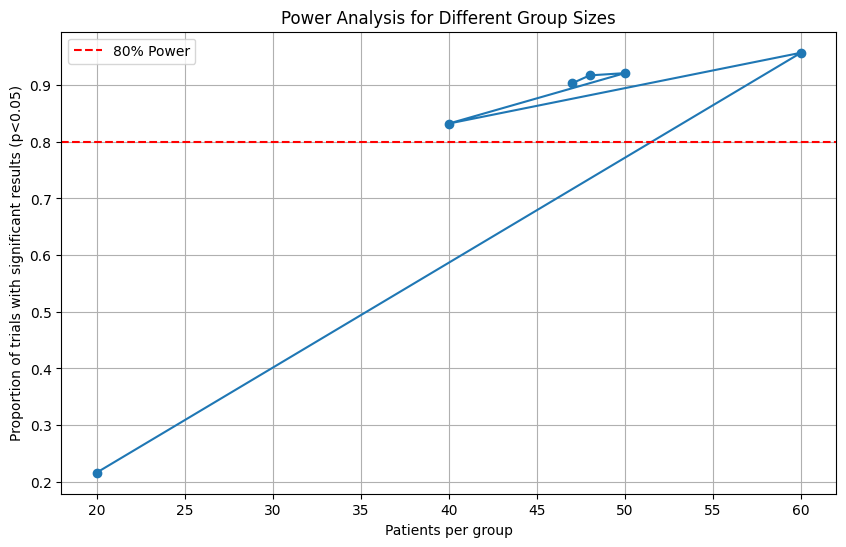

In [38]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(power_df['group size'], power_df['proportion significant'], marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Power')
plt.xlabel('Patients per group')
plt.ylabel('Proportion of trials with significant results (p<0.05)')
plt.title('Power Analysis for Different Group Sizes')
plt.legend()
plt.grid(True)
plt.show()